# Scikit-Learn_Workshop_4-Unsupervized_Learning - Clustering Analysis

- #### Ref : http://scikit-learn.org/stable/modules/learning_curve.html
- #### [ NOTE ] :  Ref for Plotting Validation & Learning Curves - for Regression Models
     "05.03-Hyperparameters-and-Model-Validation.ipynb"   https://github.com/jakevdp/PythonDataScienceHandbook]



## [ EXAMPLE ] : with Breast Cancer Wisconsin (Original) Data Set : `wisc_bc_data.csv` 

  
##  A. Dimensionality Reduction — PCA (Principal Component Analysis) 

In [1]:
import numpy as np
import pandas as pd
wsbc = pd.read_csv("wisc_bc_data.csv")   ##  Read & save the dataset as a data frame...
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [2]:
y = wsbc['diagnosis']
X = wsbc.drop('id',  axis=1)         ##  Drop the column 'id' ...
X = X.drop('diagnosis', axis = 1)    ##  Drop the column 'diagnosis' for the feature matrix.

In [3]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)         # 4. Transform the data to two dimensions
##  X_2D

In [4]:
wsbc['PCA1'] = X_2D[:, 0]
wsbc['PCA2'] = X_2D[:, 1]
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,PCA1,PCA2
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,-383.867453,8.911869
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,-550.815536,-27.398911
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,-497.867645,-28.827235
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,-523.163457,0.873333
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,-24.214580,80.777953


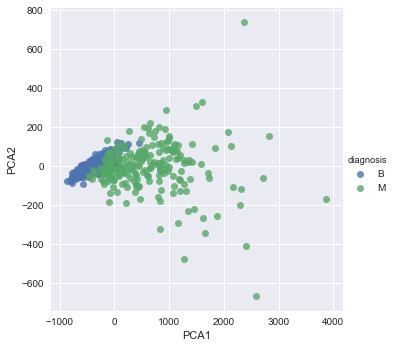

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.lmplot("PCA1", "PCA2", hue='diagnosis', data=wsbc, fit_reg=False);

####   
## B.  Unsupervised learning: Gaussian clustering

In [6]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=2,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gm = model.predict(X)         # 4. Determine cluster labels

In [7]:
wsbc['cluster'] = y_gm
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,PCA1,PCA2,cluster
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,-383.867453,8.911869,0
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,-550.815536,-27.398911,0
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,-497.867645,-28.827235,0
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,-523.163457,0.873333,0
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,-24.214580,80.777953,0


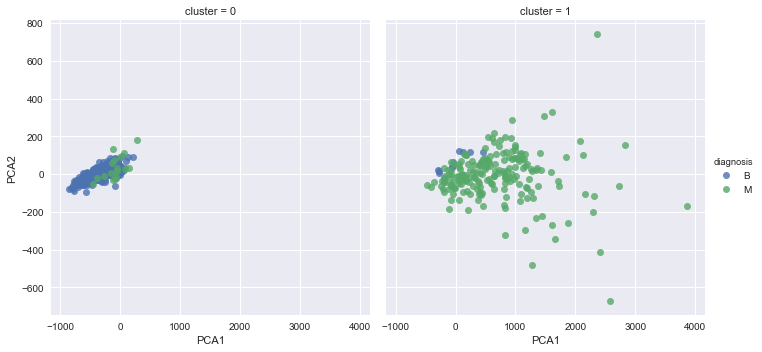

In [8]:
sns.lmplot("PCA1", "PCA2", data=wsbc, hue='diagnosis',
           col='cluster', fit_reg=False);

In [9]:
y_bin = []
for d in y:
    if d == 'B':
        y_bin.append(0)
    else:
        y_bin.append(1)
##  y_bin

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_bin, y_gm)

0.9507908611599297

####   
## C.  Unsupervised learning: K-means clustering
 - #### Code from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
 - #### [ Data ] :  `iris` dataset


 - The plots display firstly what a K-means algorithm would yield using three clusters. 
 - It is then shown what the effect of a bad initialization is on the classification process: 
       By setting n_init to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. 
 - The next plot displays what using eight clusters would deliver and finally the ground truth.

Automatically created module for IPython interactive environment


/Users/macmini1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


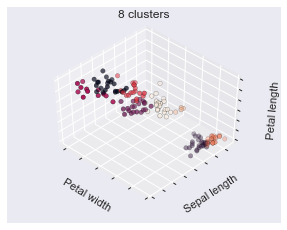

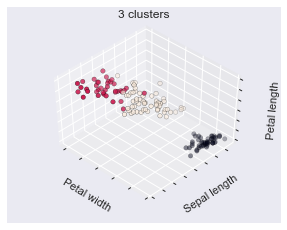

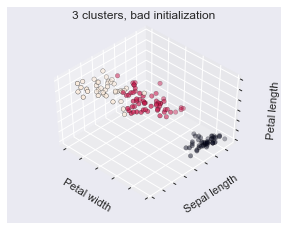

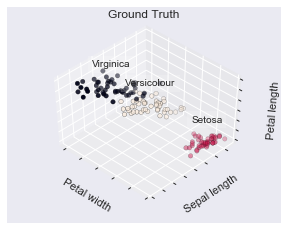

In [11]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()